In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle
import csv
from sklearn import datasets

In [2]:
data=pd.read_csv("/content/sample_data/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
data.columns=['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class'] 
data.columns  

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [6]:
data.isnull().any()

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [7]:
data[ 'blood glucose random'].fillna(data[ 'blood glucose random' ].mean(), inplace=True)
data[ 'blood_pressure'].fillna(data[ 'blood_pressure'].mean(), inplace=True) 
data[ 'blood_urea'].fillna(data[ 'blood_urea' ].mean(), inplace=True) 
data[ 'hemoglobin'].fillna(data[ 'hemoglobin' ].mean(), inplace=True) 
data[ 'packed_cell_volume'].fillna(data[ 'packed_cell_volume'].mode(), inplace=True) 
data[ 'potassium'].fillna(data[ 'potassium' ].mean(), inplace=True) 
data[ 'red_blood_cell_count'].fillna(data[ 'red_blood_cell_count'].mode(),inplace=True) 
data[ 'serum_creatinine'].fillna(data[ 'serum_creatinine' ].mean(),inplace=True) 
data[ 'sodium'].fillna(data[ 'sodium' ].mean(), inplace=True)
data[ 'white_blood_cell_count'].fillna(data[ 'white_blood_cell_count'].mode(), inplace=True) 

In [8]:
data['age' ].fillna(data['age'].mode()[0], inplace=True) 
data[ 'hypertension'].fillna(data[ 'hypertension'].mode()[0], inplace=True) 
data[ 'pus_cell_clumps' ].fillna(data[ 'pus_cell_clumps' ].mode()[0], inplace=True)
data[ 'appetite' ].fillna(data[ 'appetite' ].mode()[0], inplace=True) 
data['albumin'].fillna(data[ 'albumin' ].mode()[0], inplace=True) 
data[ 'pus_cell'].fillna(data[ 'pus_cell'].mode()[0], inplace=True) 
data[ 'red_blood_cells'].fillna(data[ 'red_blood_cells'].mode()[0], inplace=True) 
data['coronary_artery_disease'].fillna(data[ 'coronary_artery_disease'].mode()[0], inplace=True) 
data[ 'bacteria' ].fillna(data[ 'bacteria' ].mode()[0], inplace=True) 
data['anemia'].fillna(data[ 'anemia' ].mode()[0], inplace=True) 
data[ 'sugar' ].fillna(data[ 'sugar' ].mode()[0], inplace=True) 
data[ 'diabetesmellitus' ].fillna(data['diabetesmellitus' ].mode()[0], inplace=True) 
data['pedal_edema'].fillna(data[ 'pedal_edema' ].mode()[0], inplace=True) 
data[ 'specific_gravity'].fillna(data[ 'specific_gravity' ].mode()[0], inplace= True)

In [9]:
data.isnull().sum()

id                           0
age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells              0
pus_cell                     0
pus_cell_clumps              0
bacteria                     0
blood glucose random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
hemoglobin                   0
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 0
diabetesmellitus             0
coronary_artery_disease      0
appetite                     0
pedal_edema                  0
anemia                       0
class                        0
dtype: int64

In [10]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'pus_cell_clumps', 'anemia', 'pedal_edema', 'class', 'packed_cell_volume', 'hypertension', 'pus_cell', 'red_blood_cell_count', 'diabetesmellitus', 'bacteria', 'white_blood_cell_count', 'coronary_artery_disease', 'appetite', 'red_blood_cells'}


In [11]:
for i in catcols:
  print("Columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

Columns : pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
************************************************************************************************************************

Columns : anemia
Counter({'no': 340, 'yes': 60})
************************************************************************************************************************

Columns : pedal_edema
Counter({'no': 324, 'yes': 76})
************************************************************************************************************************

Columns : class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
************************************************************************************************************************

Columns : packed_cell_volume
Counter({nan: 70, '52': 21, '41': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38':

In [12]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'pus_cell_clumps', 'anemia', 'pedal_edema', 'class', 'hypertension', 'pus_cell', 'diabetesmellitus', 'bacteria', 'coronary_artery_disease', 'appetite', 'red_blood_cells'}


In [13]:
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus','hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [14]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi=LabelEncoder()
  print(c(data[i]))
  data[i]=LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF: coronary_arter

In [15]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'pedal_edema', 'id', 'pus_cell', 'bacteria', 'albumin', 'anemia', 'hypertension', 'blood_urea', 'sodium', 'age', 'blood_pressure', 'sugar', 'blood glucose random', 'potassium', 'serum_creatinine', 'specific_gravity', 'appetite', 'red_blood_cells', 'pus_cell_clumps', 'class', 'diabetesmellitus', 'coronary_artery_disease', 'hemoglobin'}


In [16]:
for i in contcols:
  print("Continuous Columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

Continuous Columns : pedal_edema
Counter({0: 324, 1: 76})
************************************************************************************************************************

Continuous Columns : id
Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 1

In [17]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'pedal_edema', 'id', 'pus_cell', 'bacteria', 'anemia', 'hypertension', 'blood_urea', 'sodium', 'age', 'blood_pressure', 'blood glucose random', 'potassium', 'serum_creatinine', 'appetite', 'red_blood_cells', 'pus_cell_clumps', 'class', 'diabetesmellitus', 'coronary_artery_disease', 'hemoglobin'}


In [18]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'pedal_edema', 'id', 'pus_cell', 'red_blood_cell_count', 'bacteria', 'anemia', 'hypertension', 'blood_urea', 'sodium', 'white_blood_cell_count', 'age', 'blood_pressure', 'blood glucose random', 'potassium', 'serum_creatinine', 'appetite', 'red_blood_cells', 'pus_cell_clumps', 'class', 'packed_cell_volume', 'diabetesmellitus', 'coronary_artery_disease', 'hemoglobin'}


In [19]:
catcols.append('specific_gravity')
catcols.append('albumin')
catcols.append('sugar')
print(catcols)

['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells', 'specific_gravity', 'albumin', 'sugar']


In [20]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({1: 364, 2: 34, 0: 2})

In [21]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':''})
c(data['diabetesmellitus'])

Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

In [22]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,sodium,potassium,hemoglobin,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,137.528754,4.627244,12.526437,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,9.204273,2.819783,2.716171,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,135.000000,4.000000,10.875000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,137.528754,4.627244,12.526437,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,141.000000,4.800000,14.625000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,163.000000,47.000000,17.800000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


<ipython-input-23-fc1088390bcd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

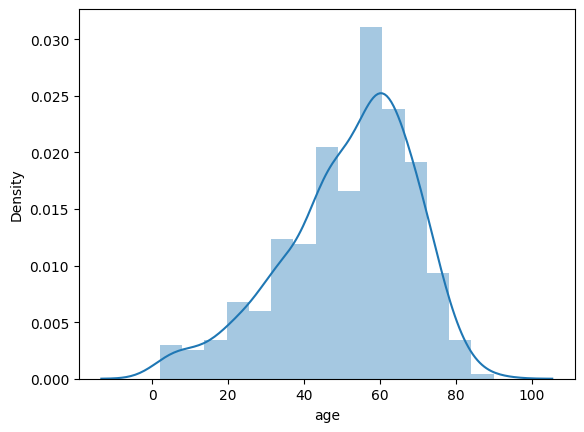

In [23]:
import seaborn as sns
sns.distplot(data.age)

Text(0.5, 1.0, 'age VS blood Scatter plot')

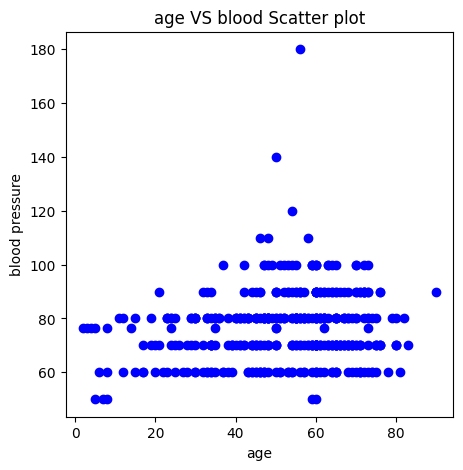

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title("age VS blood Scatter plot")

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


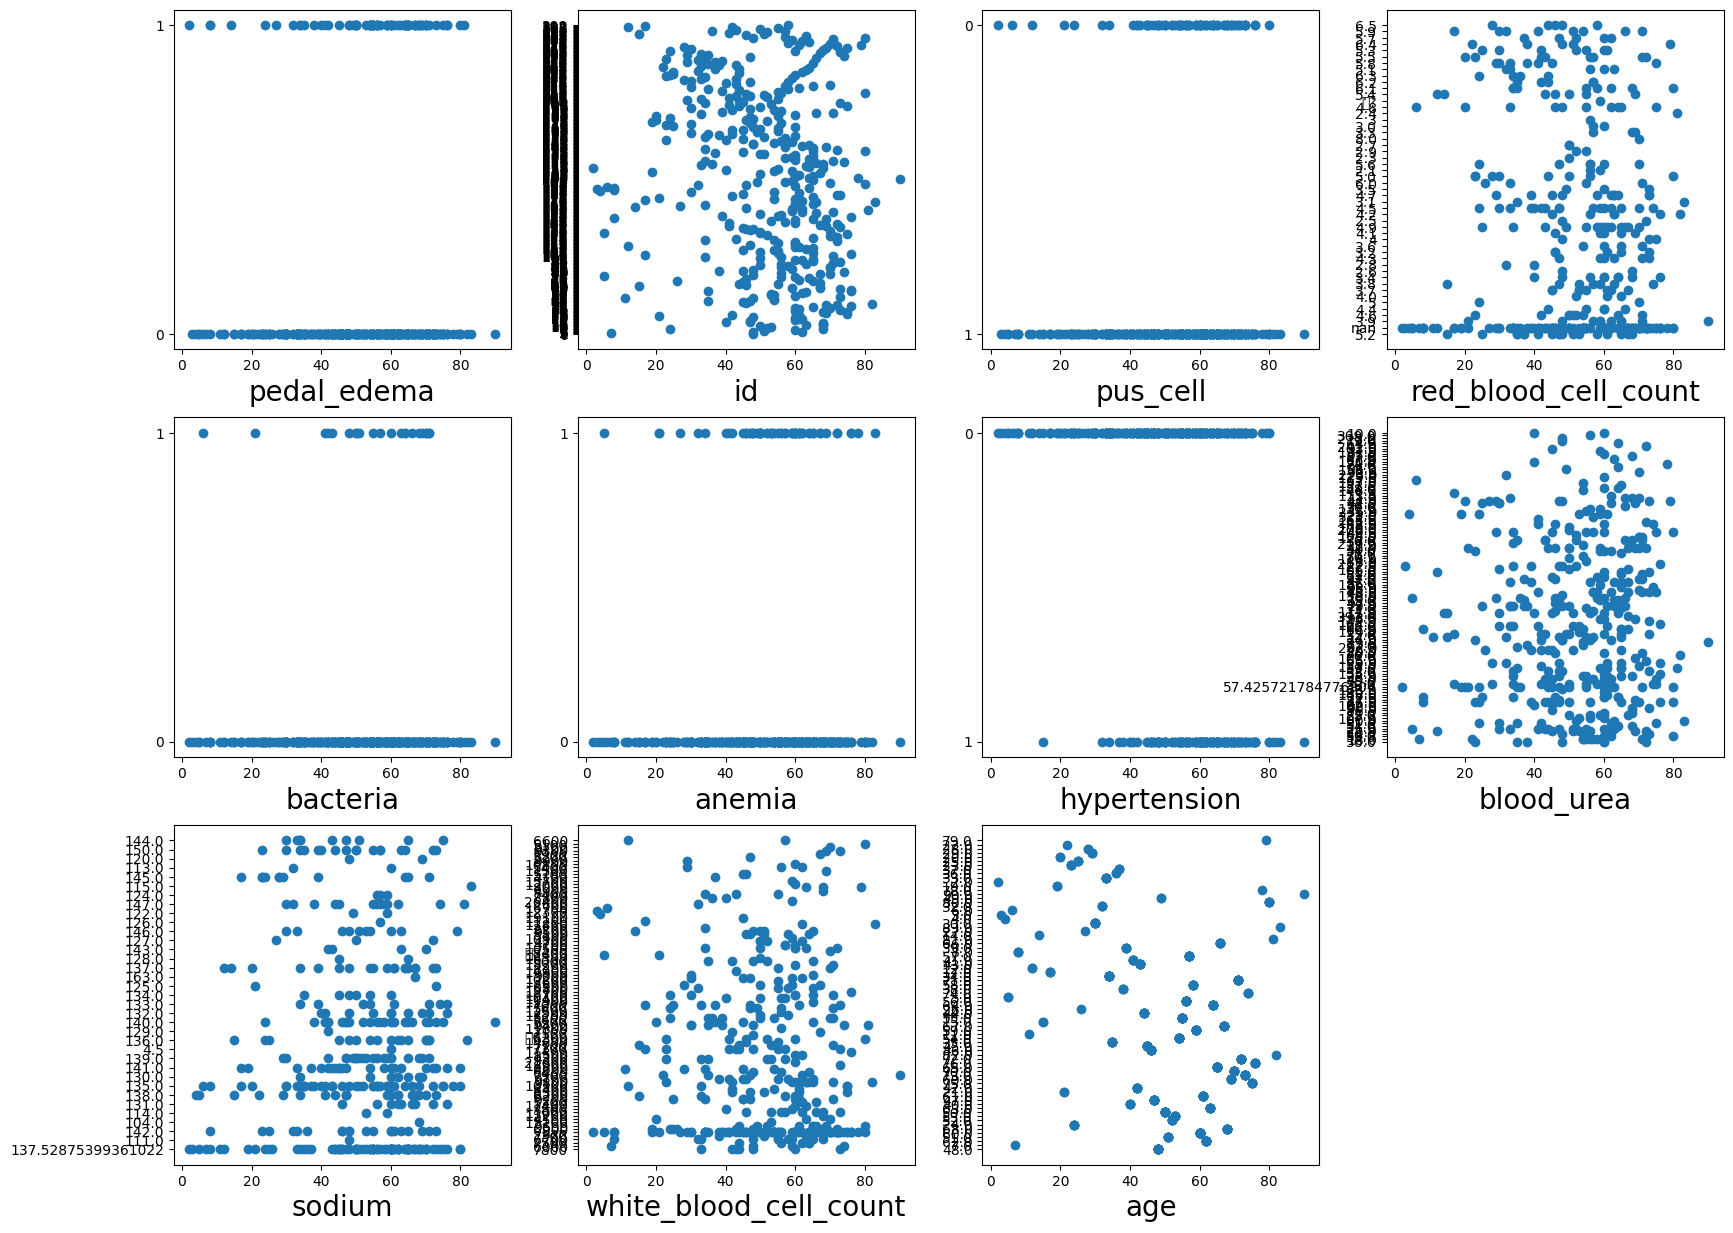

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
  if plotnumber<=11:
    ax=plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column].astype(str))
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()

<ipython-input-26-b71ef191511c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")


<function matplotlib.pyplot.show(close=None, block=None)>

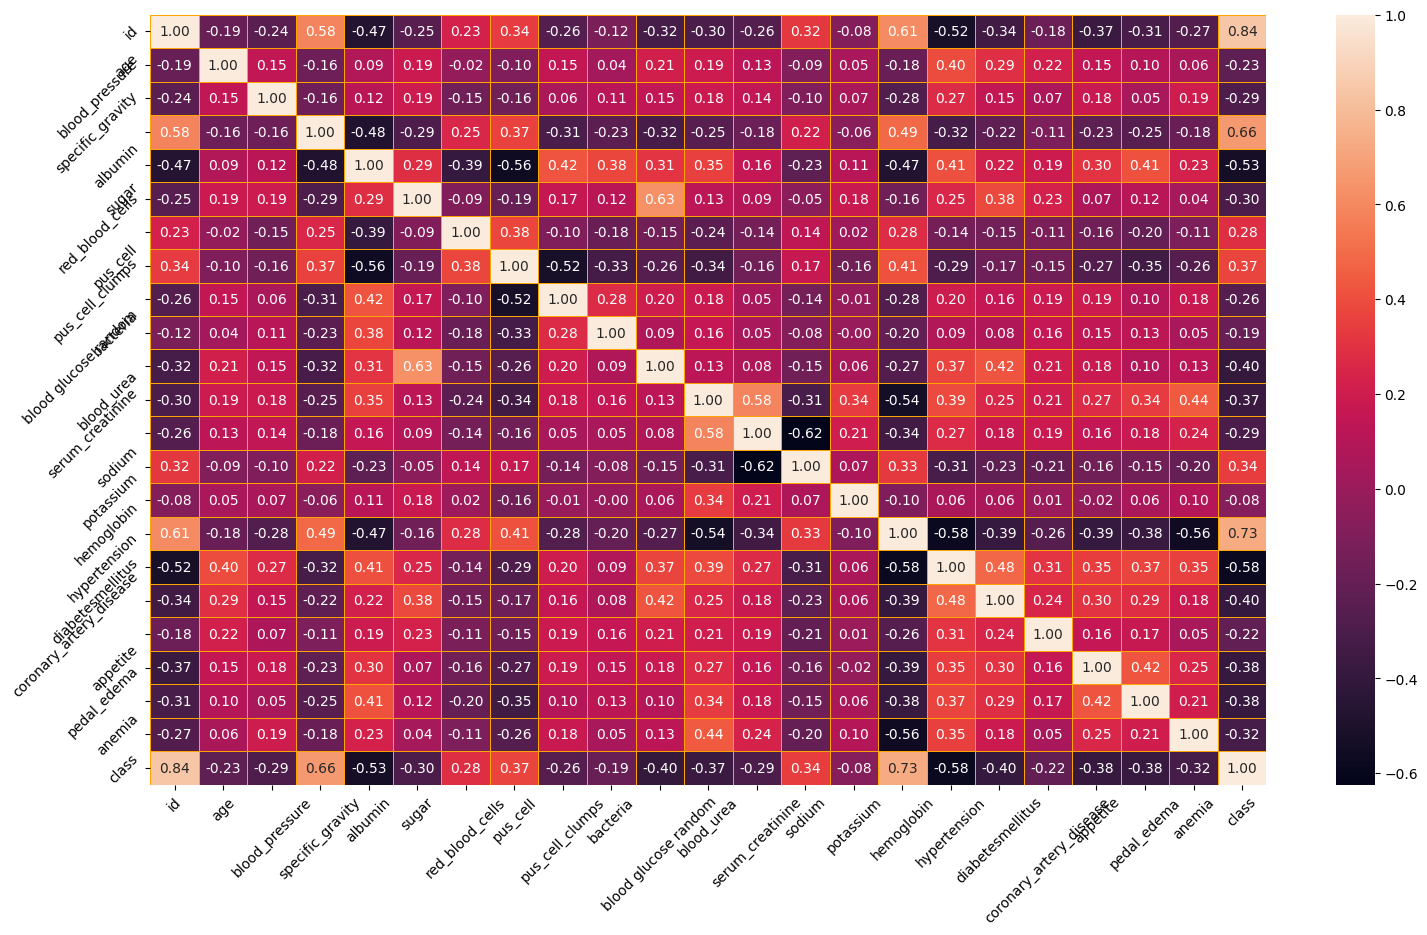

In [26]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show

<Axes: xlabel='class', ylabel='count'>

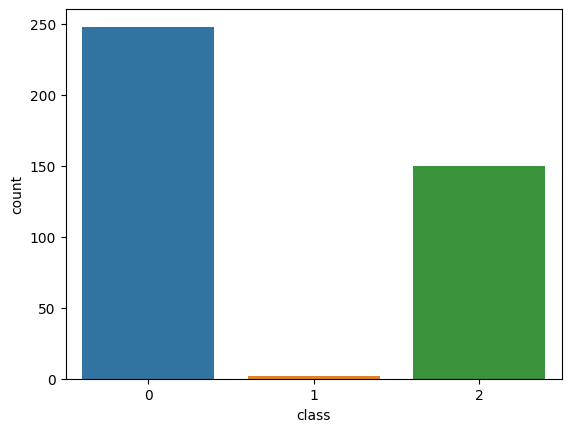

In [27]:
import seaborn as sns
sns.countplot(x='class',data=data)

In [28]:
from sklearn.preprocessing import StandardScaler

x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

sc = StandardScaler()
x_std = sc.fit_transform(x)
x_bal = sc.fit_transform(x)

In [29]:
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetasmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [31]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [33]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5977 - val_loss: nan - val_accuracy: 0.6562
Epoch 8/100
26/26 [==============================] - 0s

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)

rfc.fit(x_train,y_train)

<ipython-input-36-a625057ccd1b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [37]:
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)
y_predict = rfc.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


ValueError: ignored

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
y_predict_train=rfc.predict(x_train)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [40]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
y_predict=dtc.predict(x_test)
y_predict

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: ignored

In [42]:
y_predict_train=dtc.predict(x_train)

In [43]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

y_predict=lgr.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


ValueError: ignored

In [45]:
y_pred=lgr.predict([[1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


array([2])

In [46]:
y_pred=lgr.predict([[1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


array([2])

In [47]:
y_pred=rfc.predict([[1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[0]


array([0])

In [48]:
classification.save("ckd.h5")

In [49]:
y_pred=classification.predict(x_test)



3/3 [==============================] - 0s 3ms/step


In [50]:
y_pred

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [51]:
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [52]:
def predict_exit(sample_value):
  sample_value=np.array(sample_value)
  sample_value=sample_value.reshape(1,-1)
  sample_value=sc.transform(sample_value)
  return classifier.predict(sample_value)

In [53]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
  print('Prediction: High chance of CKD!')
else:
  print('prediction: Low chance of CKD.')

1/1 [==============================] - 0s 70ms/step
prediction: Low chance of CKD.


In [54]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

dfs = []
models = [('Logreg', LogisticRegression()),('RFC',RandomForestClassifier()),('DecisionTree',DecisionTreeClassifier())]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted','f1_weighted','roc_auc']
target_names = ['NO CKD','CKD']

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name)
    print(classification_report(y_test,y_pred,target_names=target_names))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)

final = pd.concat(dfs,ignore_index=True)
print(final)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent cal

ValueError: ignored

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
model=LogisticRegression
model.fit(x_train, y_train)
cm=confusion_matrix(y_test,y_predict)
cm

AttributeError: ignored

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

NameError: ignored

<Figure size 800x600 with 0 Axes>

In [57]:
from sklearn.metrics import confusion_matrix 
cm = confusion_metrix(y_test,y_predict)
cm

NameError: ignored

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues', annot=True, xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

NameError: ignored

<Figure size 800x600 with 0 Axes>

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

NameError: ignored

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues', annot=True, xticklabels=['no ckd','ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix for DecisionTreeClassifier')
plt.show()

NameError: ignored

<Figure size 800x600 with 0 Axes>

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80        53
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        26

    accuracy                           0.66        80
   macro avg       0.22      0.33      0.27        80
weighted avg       0.44      0.66      0.53        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[53,  0,  0],
       [ 1,  0,  0],
       [26,  0,  0]])

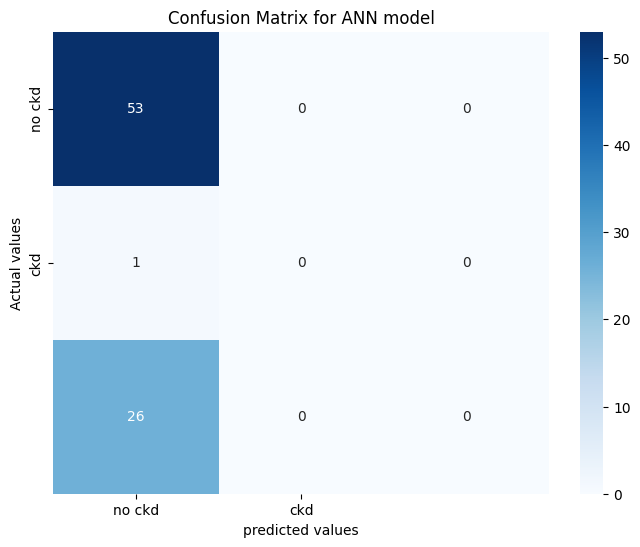

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [64]:
bootstraps=[]
for model in list(set(final.model.values)):
  model_df=final.loc[final.model==model]
  bootstrap=model_df.sample(n=30, replace=True)
  bootstraps.append(bootstrap)
bootstrap_df=pd.concat(bootstraps, ignore_index=True)
results_long=pd.melt(bootstrap_df, id_vars=['model'], var_name='metrics', value_name='values')
time_metrics=['fit_time','score_time']
results_long_nofit=results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_nofit=results_long_nofit.sort_values(by='values')
results_long_fit=results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit=results_long_fit.sort_values(by='values')

NameError: ignored

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g=sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="set3")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

NameError: ignored

<Figure size 2000x1200 with 0 Axes>

In [66]:
pickle.dump(lgr,open('CKD.pkl','wb'))